# Training Models

## Linear Regression in Normal Equation

$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$

$\hat{y} = h_\theta(\mathbf{x}) = \theta^T \cdot \mathbf{x}$

$MSE(\mathbf{X}, h_\theta) = \dfrac{1}{m}\sum_{i=1}^{m}(\theta^T\cdot\mathbf{x}^{(i)} - y^{(i)})^2$

$\hat{\theta} = (\mathbf{X}^T\cdot\mathbf{X})^{-1}\cdot\mathbf{X}^T\cdot\mathbf{y}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)

In [124]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

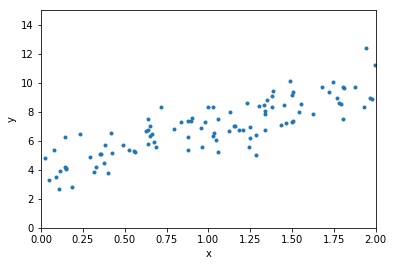

In [126]:
plt.plot(X, y, '.')
plt.xlabel("x")
plt.ylabel("y")
plt.axis([0, 2, 0, 15]);

In [125]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each sample
X_b[:3]

array([[1.        , 1.35025977],
       [1.        , 0.83489657],
       [1.        , 1.46135802]])

In [127]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.02838176],
       [2.87438731]])

Our original function is:

$y = 4 + 3x_1 + noise$

but we've got 4.02 and 2.87 as result - it's close enough but it's not exactly the same because of the noise

In [128]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.02838176],
       [9.77715637]])

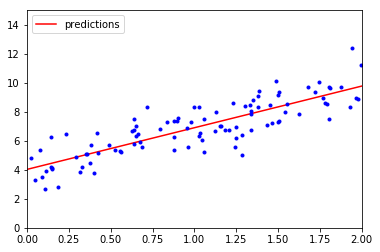

In [129]:
plt.plot(X_new, y_predict, "r-", label='predictions')
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left");

The same in scikit-learn:

In [7]:
from sklearn.linear_model import LinearRegression

In [131]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.02838176]), array([[2.87438731]]))

In [132]:
lin_reg.predict(X_new)

array([[4.02838176],
       [9.77715637]])

## Batch Gradient Descent

$\dfrac{\partial}{\partial{\theta_j}}MSE(\theta) = \dfrac{2}{m}\sum_{i=1}^{m}(\theta^T\cdot\mathbf{x}^{(i)} - y^{(i)})x_j^{(i)}$

$\nabla_{\theta}MSE(\theta) = \left\lgroup\begin{array}{c}
\dfrac{\partial}{\partial{\theta_0}}MSE(\theta)\\
\dfrac{\partial}{\partial{\theta_1}}MSE(\theta)\\
\vdots\\
\dfrac{\partial}{\partial{\theta_n}}MSE(\theta)\\
\end{array}\right\rgroup = \dfrac{2}{m}\mathbf{X}^T\cdot(\mathbf{X}\cdot\theta-\mathbf{y})$

$\theta^{(next{\space}step)} = \theta - \eta\nabla_{\theta}MSE(\theta)$

In [12]:
eta = 0.1    # learning speed
n_iterations = 1000
m = 100  # number of samples

theta = np.random.randn(2, 1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
theta_path_bgs = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10 or iteration == 999:
            y_predict = X_new_b.dot(theta)
            if iteration == 0:
                style = 'r--'
            elif iteration == 999:
                style = 'g-'
            else:
                style = 'b-'
            # style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta$ = {}".format(eta))

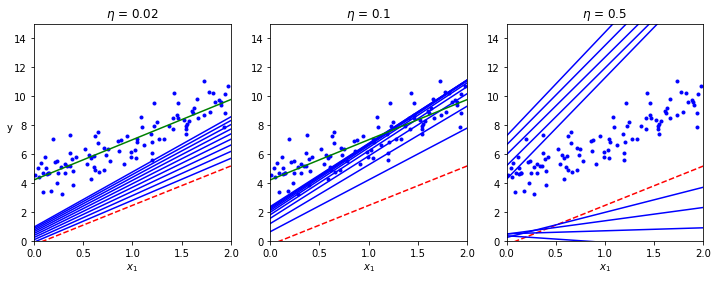

In [15]:
theta = np.random.randn(2, 1)

plt.figure(figsize=(12, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("y", rotation=0)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgs)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

## Stochastic Gradient Descent

In [114]:
def plot_stoch_gradient_desc(theta, style):
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, style)

Final theta:
[[4.59252399]
 [2.55734893]]


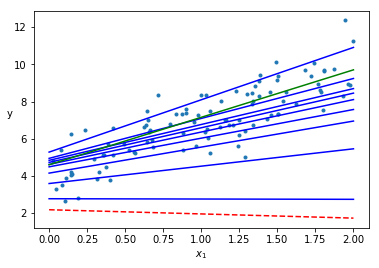

In [140]:
plt.plot(X, y, '.')
plt.xlabel(r"$x_1$")
plt.ylabel("y", rotation=0)

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        if i < 10 and epoch == 0:
            style = 'b-' if i > 0 else 'r--'
            plot_stoch_gradient_desc(theta, style)

plot_stoch_gradient_desc(theta, 'g-')

print("Final theta:\n{}".format(theta))

Almost the same by Scikit-Learn:

In [18]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())  # X.shape = (100, 1), y.shape = (100, 1) -> (100)

sgd_reg.intercept_, sgd_reg.coef_

(array([4.25873097]), array([2.81460429]))

In [19]:
def batch_gradient_descent(theta):
    theta_0 = []
    theta_1 = []
    
    eta = 0.1    # learning speed
    n_iterations = 1000
    m = 100  # number of samples

    for iteration in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_0.append(theta.ravel()[0])
        theta_1.append(theta.ravel()[1])
    return theta_0, theta_1
        
def stoch_gradient_descent(theta):
    theta_0 = []
    theta_1 = []
    
    n_epochs = 50
    t0, t1 = 5, 50

    def learning_schedule(t):
        return t0 / (t + t1)

    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients
            theta_0.append(theta.ravel()[0])
            theta_1.append(theta.ravel()[1])
    return theta_0, theta_1

Initial theta_0 = 0.8842423057738108
Initial theta_1 = 1.1698009525885504


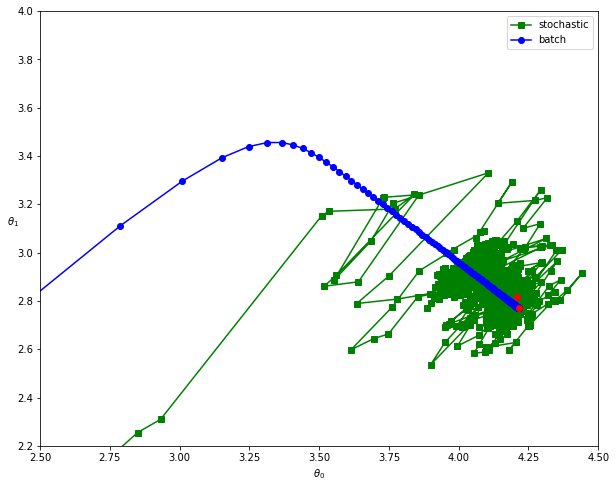

In [20]:
plt.figure(figsize=(10, 8))
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.5, 4.5, 2.2, 4.0])

theta = np.random.randn(2, 1)  # random initialization
print("Initial theta_0 = {}\nInitial theta_1 = {}".format(theta.ravel()[0], theta.ravel()[1]))
# plt.plot(theta[0], theta[1], 'or')

for model, style, label in zip([stoch_gradient_descent, batch_gradient_descent], 
                               ['gs-', 'bo-'],
                               ['stochastic', 'batch']):
    theta_0, theta_1 = model(theta)
    plt.plot(theta_0, theta_1, style, label=label)
    plt.plot(theta_0[-1], theta_1[-1], 'ro')
plt.legend(loc="best");

## Polynomial Regression

In [88]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

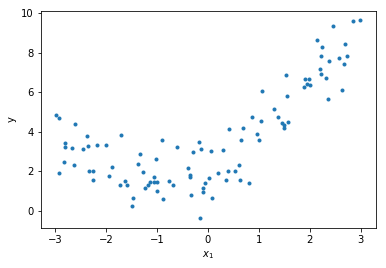

In [89]:
plt.plot(X, y, '.')
plt.xlabel(r"$x_1$")
plt.ylabel("y");

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly = poly_features.fit(X)
X_poly = poly_features.fit_transform(X)
poly.get_feature_names()

['x0', 'x0^2']

In [92]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.1868765]), array([[1.01348838, 0.51475696]]))

Our original function:

$y=0.5x_1^2+1.0x_1+2.0+noise$

Our predicted function:

$y=0.51x_1^2+1.01x_1+2.18$

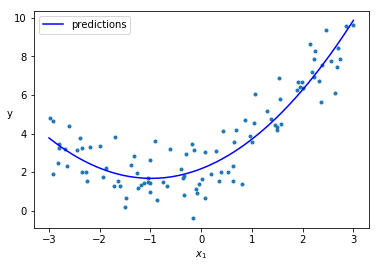

In [93]:
X_new = np.linspace(-3, 3, 1000).reshape(-1, 1)
X_new_poly = poly_features.fit_transform(X_new)

plt.plot(X, y, '.')
plt.plot(X_new, lin_reg.predict(X_new_poly), 'b-', label='predictions')
plt.xlabel(r"$x_1$")
plt.ylabel("y", rotation=0)
plt.legend();

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

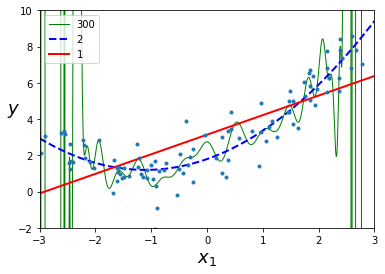

In [68]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-", 2, 1)):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([("poly_features", poly_features),
                                      ("std_scaler", std_scaler),
                                      ("lin_reg", lin_reg)])
    polynomial_regression.fit(X, y)
    y_predicted = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_predicted, style, linewidth=width, label=str(degree))
    
plt.plot(X, y, ".")
plt.axis([-3, 3, -2, 10])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left");

## Learning Curves

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [75]:
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        test_errors.append(mean_squared_error(y_test, y_test_pred))
    plt.plot(np.sqrt(train_errors), "r-", label="train")
    plt.plot(np.sqrt(test_errors), "b-", label="test")
    plt.legend(loc="upper right")
    plt.axis([0, 80, 0, 3])
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")

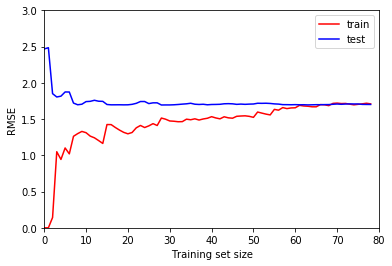

In [99]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [9]:
from sklearn.pipeline import make_pipeline

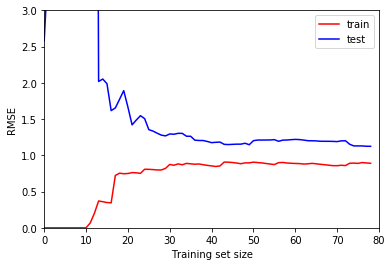

In [100]:
polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())
plot_learning_curves(polynomial_regression, X, y)

## Regularized Models

### Ridge

$J(\theta) = MSE(\theta) + \alpha\dfrac{1}{2}\sum_{i=1}^{n}\theta_i^2$

The solution (i.e. $\theta$ for minimum) is:

$\hat{\theta} = (\mathbf{X}^T\cdot\mathbf{X} + \alpha\mathbf{A})^{-1}\cdot\mathbf{X}^T\cdot\mathbf{y}$

In [4]:
from sklearn.linear_model import Ridge

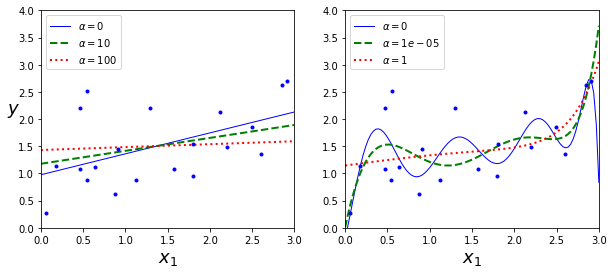

In [12]:
np.random.seed(42)

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(-1, 1)

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kwargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = make_pipeline(PolynomialFeatures(degree=10, include_bias=False),
                                  StandardScaler(),
                                  model)
        model.fit(X, y)
        y_new = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    plt.legend(loc="upper left")

plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 1E-5, 1), random_state=42)

### Lasso

$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}|\theta_i|$

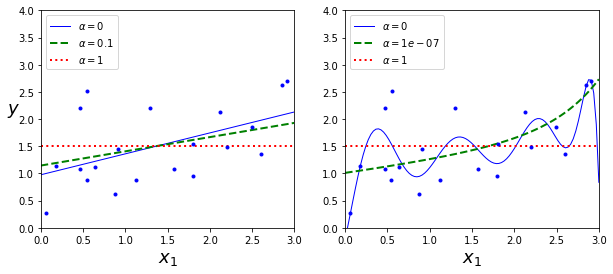

In [109]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(10, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1E-7, 1), tol=1, random_state=42)

Subgradient vector for Lasso:

$g(\theta, J)=\nabla_{\theta}MSE(\theta)+\alpha\left\lgroup\begin{array}{c}
sign(\theta_1)\\
sign(\theta_2)\\
\vdots\\
sign(\theta_n)\\
\end{array}\right\rgroup$, where
$sign(\theta_i) = \begin{cases}
-1,\:if\:\theta_i < 0\\
\phantom{-}0,\:if\:\theta_i = 0\\
+1,\:if\:\theta_i > 0\\
\end{cases}$

In [1]:
from sklearn.linear_model import Lasso

In [13]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic Net

If r = 0 => Ridge

If r = 1 => Lasso

$J(\theta)=MSE(\theta) + r\alpha\sum_{i=1}^{n}|\theta_{i}|+\dfrac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_{i}^2$

In [14]:
from sklearn.linear_model import ElasticNet

In [15]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ration corresponds to r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

In [17]:
from sklearn.linear_model import SGDRegressor

Best epoch:  295


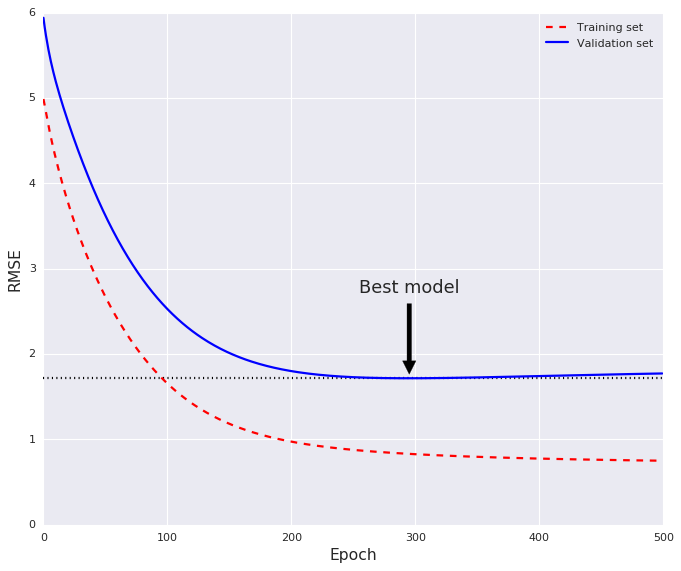

In [40]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X * 0.5 + X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, 
                       penalty=None, 
                       warm_start=True, 
                       eta0=0.0005, 
                       learning_rate="constant", 
                       random_state=42)

train_errors, val_errors = [], []
n_epochs = 500

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

with plt.style.context("seaborn"):
    plt.figure(figsize=(10, 8))
    plt.annotate('Best model',
                 xy=(best_epoch, best_val_rmse),
                 xytext=(best_epoch, best_val_rmse + 1),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=16,
                )

    plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
    plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="Validation set")
    plt.ylabel("RMSE", fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.legend();
    print("Best epoch: ", best_epoch)

In [36]:
from sklearn.base import clone

In [41]:
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, eta0=0.0005, 
                       penalty=None, learning_rate="constant", random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [42]:
best_epoch, best_model

(295, SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.0005,
        fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
        loss='squared_loss', max_iter=1, n_iter=None, penalty=None,
        power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
        warm_start=True))

## Logistic Regression

$\hat{p}=h_\theta(\mathbf{x})=\sigma(\theta^T\cdot\mathbf{x})$

$\sigma(t) = \dfrac{1}{1 + \text{exp}(-t)}$

$\hat{y} = \begin{cases}
0,\:\text{if}\:\hat{p}<0.5\\
1,\:\text{if}\:\hat{p}\geq0.5\\
\end{cases}$

Cost function for one sample:

$c(\theta)=\left\{\begin{array}{lr}
-log(\hat{p}), & \text{if } y=1,\\
-log(1-\hat{p}), & \text{if } y=0.\\
\end{array}\right.$

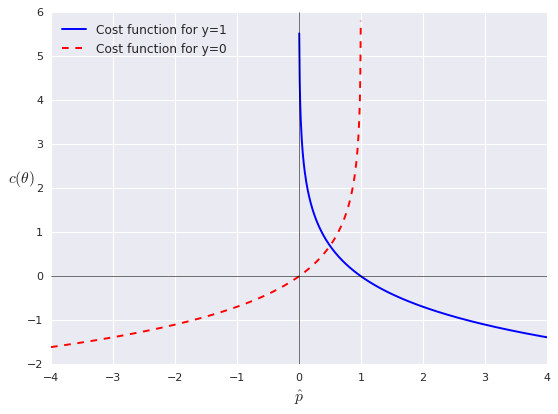

In [64]:
X = np.linspace(-4, 4, 1000)
y_1 = -np.log(X[X > 0])
y_0 = -np.log(1-X[X < 1])

with plt.style.context("seaborn"):
    plt.plot(X[X > 0], y_1, "b-", label="Cost function for y=1")
    plt.plot(X[X < 1], y_0, "r--", label="Cost function for y=0")
    plt.axhline(c="k", lw=0.5)
    plt.axvline(c="k", lw=0.5)
    plt.ylabel(r"$c(\theta)$", fontsize=14, rotation=0)
    plt.xlabel(r"$\hat{p}$", fontsize=14, rotation=0)
    plt.legend(loc="upper left", fontsize=11);

Cost function (also known as _**log loss**_) for Logistic Regression:

$J(\theta) = -\dfrac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$

$\dfrac{\partial}{\partial\theta_j}J(\theta)=\dfrac{1}{m}\sum_{i=1}^m
(\sigma(\theta^T\cdot\mathbf{x}^{(i)})-y^{(i)})x_j^{(i)})$

In [65]:
from sklearn.datasets import load_iris
iris = load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [72]:
iris["data"][:5, 3:]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [77]:
X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

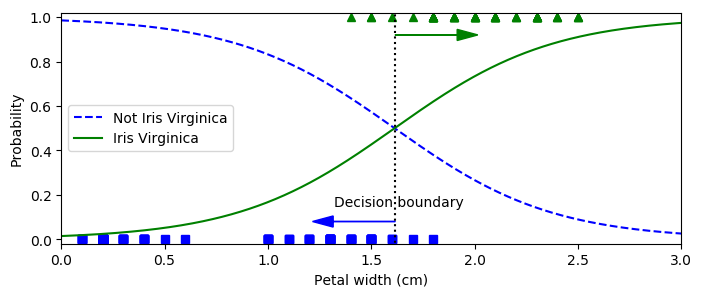

In [106]:
plt.style.use("default")
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris Virginica")
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris Virginica")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:")
plt.text(decision_boundary+0.02, 0.15, "Decision boundary", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.axis([0, 3, -0.02, 1.02])
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left");

## Softmax Regression

Sum of points for the class _k_:

$s_k(\mathbf{x})=(\theta^{(k)})^T\cdot\mathbf{x}$

Softmax function (probability that the sample **x** belongs to the class _k_):

$\hat{p}_k=\sigma(\mathbf{s}(\mathbf{x}))_k=
\dfrac{\text{exp}(s_k(\mathbf{x}))}{\sum_{j=1}^K\text{exp}(s_j(\mathbf{x}))}$

- K - amount of classes
- $\mathbf{s}(\mathbf{x})$ - vector of sum of points of each class for the sample $\mathbf{x}$

Prediction of the softmax classifier:

$
\DeclareMathOperator*{\argmax}{argmax}
\DeclareMathOperator*{\argmin}{argmin}
\hat{y}=\argmax_{k}\sigma(\mathbf{s}(\mathbf{x}))_k=\argmax_ks_k(\mathbf{x})=\argmax_k((\theta^{(k)})^T\cdot\mathbf{x})$

Cost function (__cross entropy__):

$J(\Theta)=-\dfrac{1}{m}\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)}log(\hat{p}_k^{(i)})$

$y_k^{(i)}$ is equal 1 if target class for the sample i is k; Otherwise 0

Gradient-vector for cross entropy for the class __k__:

$\nabla_{\theta^{(k)}}J(\Theta)=\dfrac{1}{m}\sum_{i=1}^m(\hat{p}_k^{(i)}-y_k^{(i)})\mathbf{x}^{(i)}$

# Exercise:
## Batch Gradient Descent with Early Stopping for Softmax Regression
### (without Scikit-Learn model)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris_dataset = load_iris()

In [94]:
X = iris_dataset["data"][:, [2, 3]]  # petal length, petal width
y = iris_dataset["target"]

In [4]:
X_with_bias = np.c_[np.ones((len(X), 1)), X]
X_with_bias[:3]

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2]])

In [5]:
test = np.hstack((np.ones((len(X), 1)), X))
test[:3]

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2]])

In [6]:
np.random.seed(2042)

In [7]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = int(total_size - test_size - validation_size)

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_val = X_with_bias[rnd_indices[train_size:-test_size]] 
y_val = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [8]:
y_train

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       1, 2, 0, 0, 0, 2, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2,
       0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2,
       2, 0, 0, 0, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0,
       0, 0])

In [9]:
def one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [10]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [11]:
one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [12]:
Y_train_one_hot = one_hot(y_train)
Y_val_one_hot = one_hot(y_val)
Y_test_one_hot = one_hot(y_test)
len(Y_train_one_hot), len(Y_val_one_hot), len(Y_test_one_hot), total_size

(90, 30, 30, 150)

Function to calculate the matrix of $\hat{p}$ values:

In [13]:
def softmax_function(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [14]:
n_features = X_train.shape[1]  # = 3 (2 features and 1 for bias)
n_classes = len(np.unique(y_train))  # = 3
print(n_features, n_classes)

3 3


In [15]:
n_iterations = 5001
eta = 0.01
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_features, n_classes)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax_function(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446183864821945
500 0.8351003035768683
1000 0.6876961554414913
1500 0.6010299835452123
2000 0.5442782811959167
2500 0.5037262742244605
3000 0.4728357293908468
3500 0.4481872508179334
4000 0.4278347262806173
4500 0.4105891022823528
5000 0.3956803257488941


In [16]:
Theta

array([[ 3.3172417 , -0.6476445 , -2.99855999],
       [-1.16505434,  0.11283387,  0.10251113],
       [-0.72087779, -0.083875  ,  1.48587045]])

In [17]:
logits = X_val.dot(Theta)
Y_val_proba = softmax_function(logits)
y_val_predict = np.argmax(Y_val_proba, axis=1)
print(y_val_predict)
print(y_val)
accuracy_score = np.mean(y_val_predict == y_val)
print("Accuracy score: ", accuracy_score)

[0 2 0 0 1 2 2 0 0 0 1 1 2 2 1 1 2 1 2 1 0 1 2 2 1 0 0 1 1 1]
[0 2 0 0 1 2 2 0 0 0 1 1 2 2 1 1 2 1 2 1 0 1 2 2 1 0 0 1 1 2]
Accuracy score:  0.9666666666666667


Let's add some $\ell_2$ regularization and increase $\eta$ value:

$J(\Theta)=-\dfrac{1}{m}\sum_{i=1}^m\sum_{k=1}^Ky_k^{(i)}log(\hat{p}_k^{(i)}) + \alpha\dfrac{1}{2}\sum\limits_{i=1}^{m}\sum\limits_{j=1}^{K}\Theta_{ij}^2$

$\nabla_{\theta^{(k)}}J(\Theta)=\dfrac{1}{m}\sum_{i=1}^m(\hat{p}_k^{(i)}-y_k^{(i)})\mathbf{x}^{(i)}
+ \alpha\theta^{(k)}$

In [20]:
n_iterations = 5001
eta = 0.1
alpha = 0.1
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_features, n_classes)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax_function(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))  # Theta[0] is bias
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros((1, n_classes)), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 5.401694534093341
500 0.5401772166395025
1000 0.5056418546548881
1500 0.49548181009973724
2000 0.49167889500397943
2500 0.4901228812144888
3000 0.4894572383423477
3500 0.4891651917494826
4000 0.4890350736136309
4500 0.4889765350266736
5000 0.4889500330754466


In [21]:
logits = X_val.dot(Theta)
Y_val_proba = softmax_function(logits)
y_val_predict = np.argmax(Y_val_proba, axis=1)
print(y_val_predict)
print(y_val)
accuracy_score = np.mean(y_val_predict == y_val)
print("Accuracy score: ", accuracy_score)

[0 2 0 0 1 2 2 0 0 0 1 1 2 2 1 1 2 1 2 1 0 1 2 2 1 0 0 1 1 2]
[0 2 0 0 1 2 2 0 0 0 1 1 2 2 1 1 2 1 2 1 0 1 2 2 1 0 0 1 1 2]
Accuracy score:  1.0


Let's add early stoping:

In [23]:
n_iterations = 5001
eta = 0.1
alpha = 0.1
m = len(X_train)
epsilon = 1e-7
best_loss = np.infty

Theta = np.random.randn(n_features, n_classes)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax_function(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))  # Theta[0] is bias
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros((1, n_classes)), alpha * Theta[1:]]
    Theta = Theta - eta * gradients
    
    logits = X_val.dot(Theta)
    Y_proba = softmax_function(logits)
    xentropy_loss = -np.mean(np.sum(Y_val_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss, "best loss")
        print(iteration, loss, "early stopping!")
        break

0 2.897270765818233
500 0.5703994203168283
1000 0.5426353001362003
1500 0.5353712279883908
2000 0.5331858013860353
2500 0.5326424259886141
2735 0.532605134880217 best loss
2736 0.5326051348941514 early stopping!


In [24]:
logits = X_val.dot(Theta)
Y_val_proba = softmax_function(logits)
y_val_predict = np.argmax(Y_val_proba, axis=1)
print(y_val_predict)
print(y_val)
accuracy_score = np.mean(y_val_predict == y_val)
print("Accuracy score: ", accuracy_score)

[0 2 0 0 1 2 2 0 0 0 1 1 2 2 1 1 2 1 2 1 0 1 2 2 1 0 0 1 1 2]
[0 2 0 0 1 2 2 0 0 0 1 1 2 2 1 1 2 1 2 1 0 1 2 2 1 0 0 1 1 2]
Accuracy score:  1.0


In [79]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]
X_new_with_bias.shape

(100000, 3)

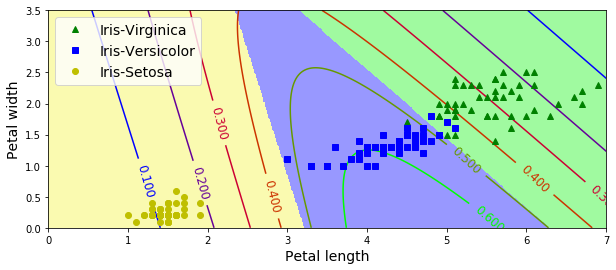

In [105]:
logits = X_new_with_bias.dot(Theta)
Y_proba = softmax_function(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5]);

In [107]:
logits = X_test.dot(Theta)
Y_proba = softmax_function(logits)
y_predict = np.argmax(Y_proba, axis=1)
accuracy_score = np.mean(y_predict == y_test)
print("Accuracy score for the test set: {:.3f}".format(accuracy_score))

Accuracy score for the test set: 0.933
